# Create Final, New Plots in this Notebook

#### Focus on the 02-29-24 model checkpoint
* Has been run on cleaner data with the original prompt

### What is the theme of our poster? 
* LLaVA X-Ray Vision: A multi-modal language model that can read and understand chest X-Rays.

Hypothesis: 
* Given report and X-ray Image pairs, can we fine tune LLaVA (a pretrained multi-modal, open source LM) to understand and produce reports to a similar level and style of a radiologist?
* Where does this method perform well? How does it underperform? What has been done in the past to address these issues?
* What can be done in the future to improve this?

A good data science project is like a good essay--has clear theme, body of work and a story. How do we create a compelling story?

Perhaps need to filter out comparison reports? A lot of reports talk about comparsion, but this isn't necessarily good for LLaVA to talk about because it cannot see the comparison

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
from eval_script import *
from bart_eval import *
import scikitplot as skplt
import re
import seaborn as sns

In [2]:
# load in data
data_path = './03-08-24/data'

# load in bart classified data
llava_rep_bart_scores_path  = os.path.join(data_path, 'llava_classified_reports_test_set.csv')
rreport_bart_scores_path = os.path.join(data_path, 'radiologist_classified_reports_test_set.csv')

llava_rep_bart_scores, radiologist_rep_bart_scores, llava_reports, radiologist_reports = read_scores_data(llava_rep_bart_scores_path, rreport_bart_scores_path)
test_inference = pd.read_csv(os.path.join(data_path, 'test_inference.csv'))
# can load train csv here if we need it later
test_inference.set_index('id', inplace=True)

train_df = pd.read_csv(os.path.join(data_path, 'train_data.csv'))

In [3]:
sent_model = SentenceTransformer('FremyCompany/BioLORD-2023')

/home/llm-hackathon/enter/envs/datalite_env/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [4]:
# v1_path = '02-29-24/data/test_inference.csv'
# v2_path = '03-02-24/data/test_inference.csv'
# v3_path = '03-03-24/data/test_inference.csv'
# v4_path = '03-03-24-01/data/test_inference.csv'

# v1 = pd.read_csv('02-29-24/data/test_inference.csv')
# v2 = pd.read_csv('03-02-24/data/test_inference.csv')
# v3 = pd.read_csv('03-03-24/data/test_inference.csv')
# v4 = pd.read_csv('03-03-24-01/data/test_inference.csv')

In [5]:
# for v in [v1, v2, v3, v4]:
#     bio_sim_scores = get_sim_scores(v['llava_report'], v['radiologist_report'], sent_model)
#     v['similarity'] = bio_sim_scores

In [6]:
# v1.to_csv(v1_path, index=False)
# v2.to_csv(v2_path, index=False)
# v3.to_csv(v3_path, index=False)
# v4.to_csv(v4_path, index=False)

In [7]:
# bio_sim_scores = get_sim_scores(test_inference['llava_report'], test_inference['radiologist_report'], sent_model)

In [8]:
# plt.figure(figsize=(10, 6))
# plt.hist(test_inference['similarity'], bins=10, alpha=0.5, label='all-mpnet-base-v2')
# plt.hist(bio_sim_scores, bins=10, alpha=0.5, label='BioLORD-2023')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.title('Histogram of ll-mpnet-base-v2 and BioLORD-2023')
# plt.legend(loc='upper left')
# plt.show()

In [9]:
# test_inference['similarity'] = bio_sim_scores
# test_inference['impression_similarity'] = get_sim_scores(test_inference['llava_impression'], test_inference['radiologist_impression'], sent_model)
# test_inference['findings_similarity'] = get_sim_scores(test_inference['llava_findings'], test_inference['radiologist_findings'], sent_model) 

In [10]:
# test_inference['is_si_l'].mean() # proportion of llava reports that say to see impression

In [11]:
# test_inference['is_si_r'].mean() # proportion of radiologist reports that say to see impression

In [12]:
# train_df

In [13]:
# rsorted = radiologist_rep_bart_scores.sort_values(by='no abnormalities mentioned')
# rsorted_ids = list(rsorted.index)
# rsorted

In [14]:
# llava_rep_bart_scores.loc[rsorted_ids]

### Confusion Matrix on Bart Labelled Data
* Let's start with the most important plot for performance of our algorithm

In [15]:
#llava_rep_bart_scores, radiologist_rep_bart_scores, llava_reports, radiologist_reports

In [16]:
llava_rep_bart_scores

cardiomegaly  pleural effusion  edema  pneumothorax  pneumonia  \
id                                                                         
54059849          0.10              0.04   0.11          0.10       0.07   
53428634          0.00              0.03   0.27          0.01       0.00   
53439132          0.02              0.04   0.02          0.02       0.01   
50219723          0.03              0.02   0.01          0.01       0.01   
52165792          0.01              0.03   0.01          0.02       0.00   
...                ...               ...    ...           ...        ...   
53657129          0.15              0.05   0.29          0.05       0.02   
53670978          0.03              0.02   0.01          0.01       0.01   
52495793          0.03              0.02   0.01          0.01       0.01   
53245718          0.03              0.05   0.07          0.09       0.07   
54233739          0.00              0.02   0.01          0.48       0.06   

          rib fracture  
id                      
54059849          0.01  
53428634          0.00  
53439132          0.01  
50219723          0.00  
52165792          0.00  
...                ...  
53657129          0.01  
53670978          0.00  
52495793          0.00  
53245718          0.02  
54233739          0.00  

[2088 rows x 6 columns]

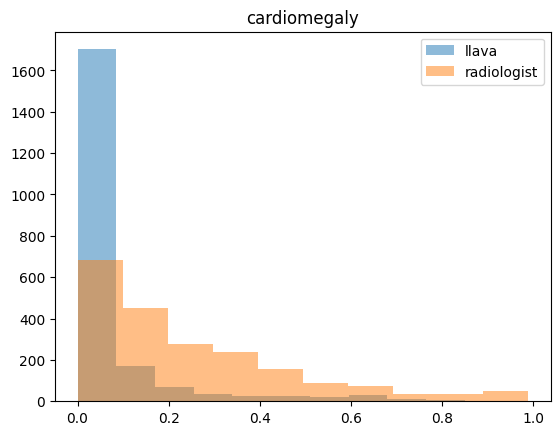

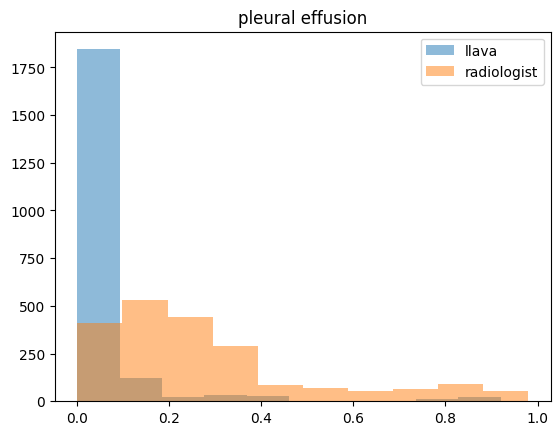

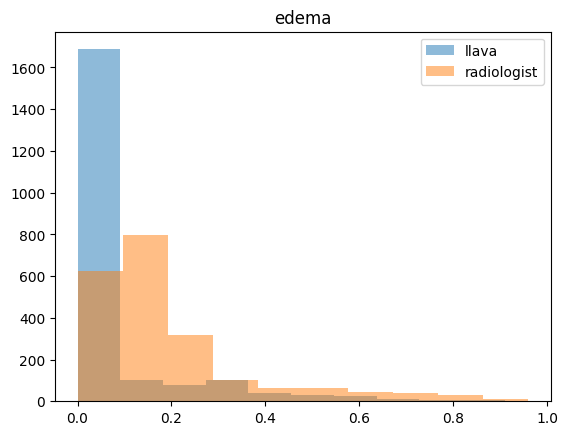

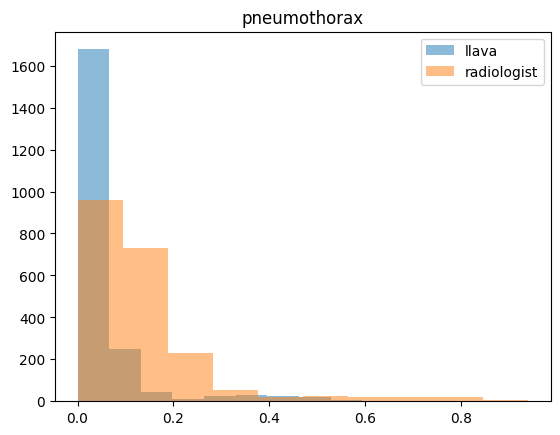

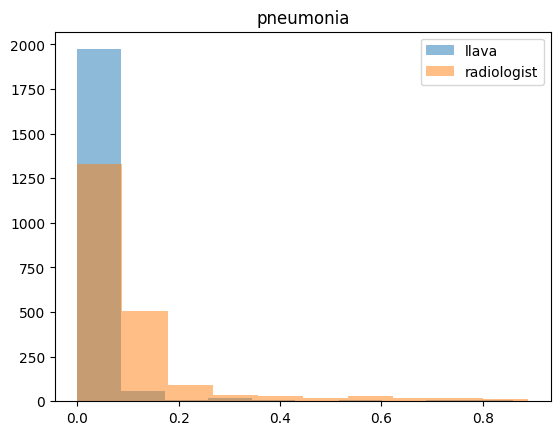

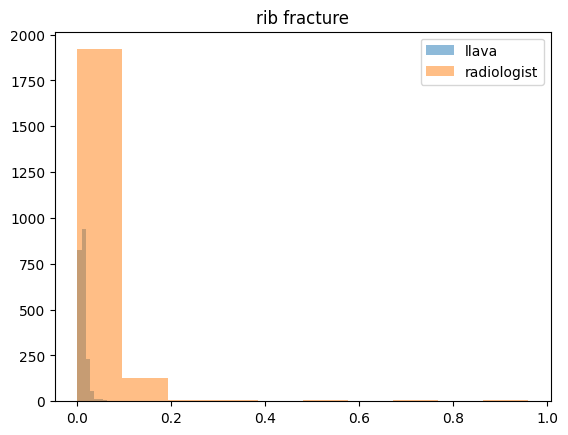

<Figure size 640x480 with 0 Axes>

In [17]:
for col in llava_rep_bart_scores.columns:
    plt.hist(llava_rep_bart_scores[col], bins=10, alpha=0.5, label='llava')
    plt.hist(radiologist_rep_bart_scores[col], bins=10, alpha=0.5, label='radiologist')
    plt.legend(loc='upper right')
    plt.title(col)
    plt.show()
    plt.clf();

In [23]:
llava_rep_labels = label_data_frame(llava_rep_bart_scores, threshold=0.5)
radiologist_rep_labels = label_data_frame(radiologist_rep_bart_scores, threshold=0.5)

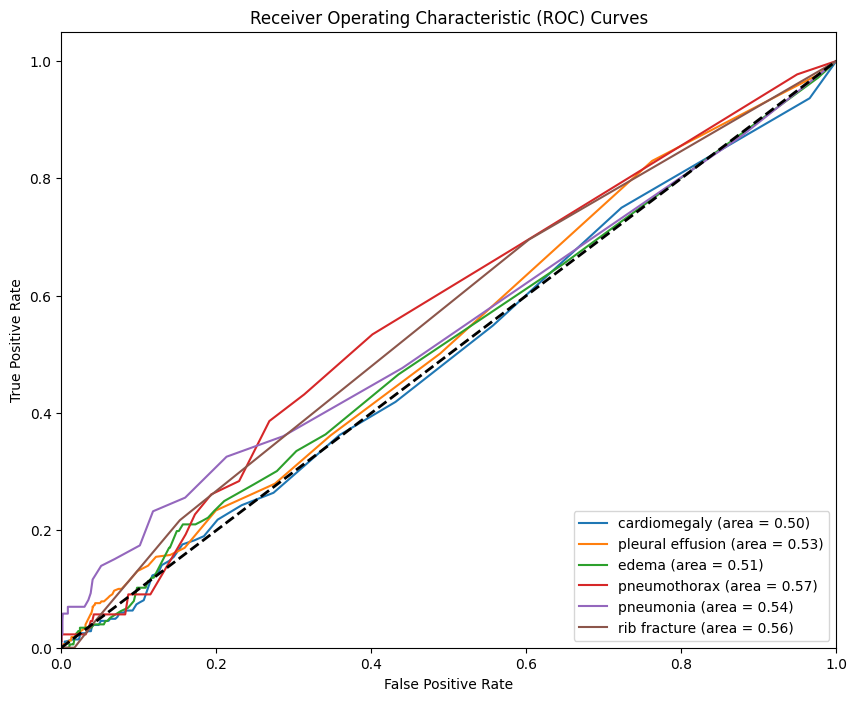

In [24]:
plot_roc_curves(radiologist_rep_labels, llava_rep_bart_scores)

In [20]:
llava_rep_labels.mean().round(2)

no abnormalities mentioned    0.82
cardiomegaly                  0.05
pneumothorax                  0.03
pneumonia                     0.02
pleural effusion              0.05
edema                         0.09
rib fracture                  0.00
dtype: float64

In [21]:
radiologist_rep_labels.mean().round(2)

no abnormalities mentioned    0.55
cardiomegaly                  0.10
pneumothorax                  0.08
pneumonia                     0.04
pleural effusion              0.25
edema                         0.19
rib fracture                  0.02
dtype: float64

In [22]:
llava_rep_labels.sum()

no abnormalities mentioned    1837
cardiomegaly                   107
pneumothorax                    68
pneumonia                       34
pleural effusion               122
edema                          200
rib fracture                     2
dtype: int64

In [23]:
radiologist_rep_labels.sum()

no abnormalities mentioned    1225
cardiomegaly                   214
pneumothorax                   180
pneumonia                       86
pleural effusion               553
edema                          424
rib fracture                    34
dtype: int64

In [24]:
radiologist_rep_labels

no abnormalities mentioned  cardiomegaly  pneumothorax  pneumonia  \
id                                                                            
54059849                        True         False         False      False   
53428634                       False          True         False      False   
53439132                        True         False         False      False   
50219723                        True         False         False      False   
52165792                        True         False         False      False   
...                              ...           ...           ...        ...   
53657129                       False         False         False       True   
53670978                        True         False         False      False   
52495793                        True         False         False      False   
53245718                       False         False          True      False   
54233739                        True         False         False      False   

          pleural effusion  edema  rib fracture  
id                                               
54059849             False  False         False  
53428634             False  False         False  
53439132             False  False         False  
50219723             False  False         False  
52165792             False  False         False  
...                    ...    ...           ...  
53657129             False   True         False  
53670978             False  False         False  
52495793             False  False         False  
53245718             False  False         False  
54233739             False  False         False  

[2232 rows x 7 columns]

In [25]:
llava_rep_labels

no abnormalities mentioned  cardiomegaly  pneumothorax  pneumonia  \
id                                                                            
54059849                       False          True         False      False   
53428634                        True         False         False      False   
53439132                        True         False         False      False   
50219723                        True         False         False      False   
52165792                        True         False         False      False   
...                              ...           ...           ...        ...   
53657129                       False         False         False      False   
53670978                        True         False         False      False   
52495793                       False         False         False      False   
53245718                        True         False         False      False   
54233739                        True         False         False      False   

          pleural effusion  edema  rib fracture  
id                                               
54059849             False  False         False  
53428634             False  False         False  
53439132             False  False         False  
50219723             False  False         False  
52165792             False  False         False  
...                    ...    ...           ...  
53657129             False   True         False  
53670978             False  False         False  
52495793             False   True         False  
53245718             False  False         False  
54233739             False  False         False  

[2232 rows x 7 columns]

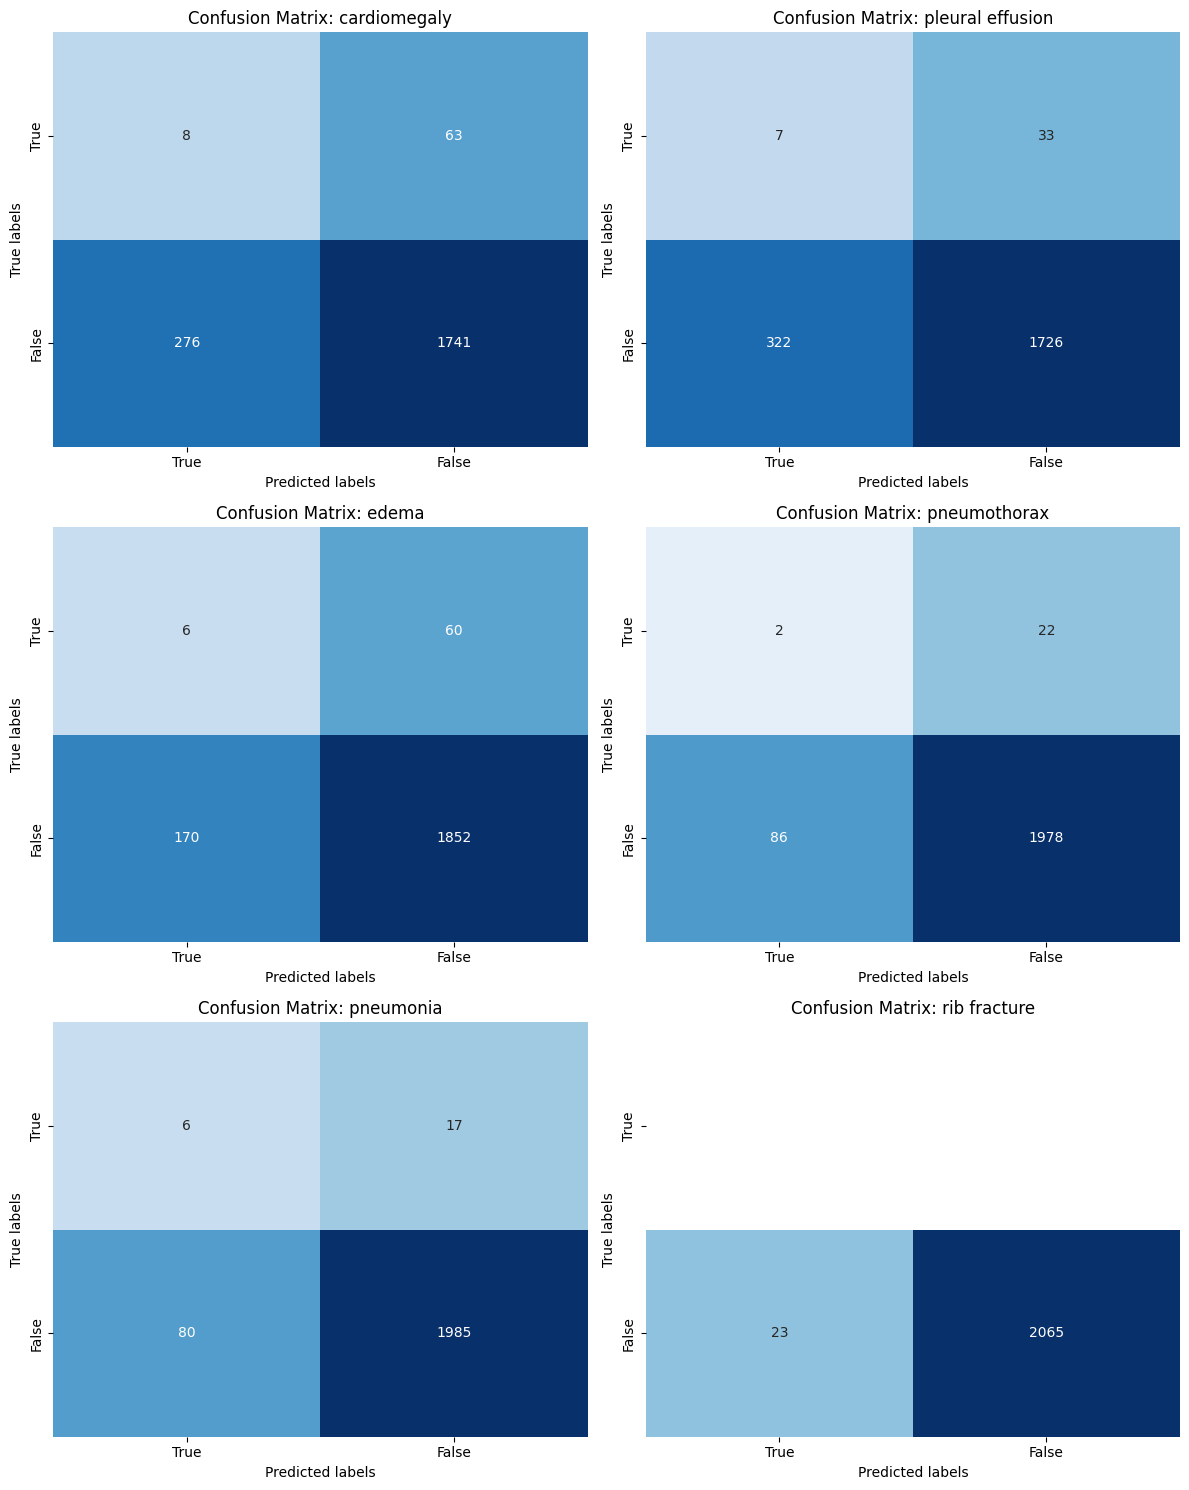

In [25]:
fig = plot_confusion_matrices(llava_rep_labels, radiologist_rep_labels)

In [27]:
from sklearn.metrics import recall_score

max_length = max(len(condition) for condition in radiologist_rep_labels.columns)  # Find the maximum length of condition names

print('Recall Scores')
for condition in radiologist_rep_labels.columns:
    recall = recall_score(radiologist_rep_labels[condition], llava_rep_labels[condition], zero_division=0).round(2)
    # Left-justify condition names so they all align nicely
    print(f'{condition.ljust(max_length)} {recall}')

Recall Scores
no abnormalities mentioned 0.89
cardiomegaly               0.09
pneumothorax               0.16
pneumonia                  0.03
pleural effusion           0.13
edema                      0.2
rib fracture               0.03


In [28]:
from sklearn.metrics import f1_score

max_length = max(len(condition) for condition in radiologist_rep_labels.columns)  # Find the maximum length of condition names

print('F1 Scores')
for condition in radiologist_rep_labels.columns:
    f1 = f1_score(radiologist_rep_labels[condition], llava_rep_labels[condition], zero_division=0).round(2)
    # Left-justify condition names so they all align nicely
    print(f'{condition.ljust(max_length)} {f1}')

F1 Scores
no abnormalities mentioned 0.71
cardiomegaly               0.12
pneumothorax               0.23
pneumonia                  0.05
pleural effusion           0.21
edema                      0.27
rib fracture               0.06


### Plot Similarity Scores
* Good to evaluate semantic similarity 
* Plot by section (don't compare stuff that's not missings)
* Can find how much "see impressions" there are
* Create a score on which section an author puts their information in vs LLaVA

In [29]:
test_inference

phonetic_id             author  \
id                                        
54059849      Abifel  Jacobs, Kathleen    
53428634      Aburik       Hahn, Lewis    
53439132    Achoroos  Smitaman, Edward    
50219723   Ackoofdek      Wyatt, Alvin    
52165792     Adefoup  Weihe, Elizabeth    
...              ...                ...   
53657129      Yuhiko   Kligerman, Seth    
53670978     Yutexug  Meisinger, Quinn    
52495793      Zedusi    Brouha, Sharon    
53245718     Zideeru       Yen, Andrew    
54233739      Zomome       Yen, Andrew    

                                             llava_findings  \
id                                                            
54059849                                                NaN   
53428634  FINDINGS:\nLines and Tubes: Interval placement...   
53439132              FINDINGS:\nPlease see Impression.\n\n   
50219723                      FINDINGS:\nSee impression\n\n   
52165792  FINDINGS:/:   \nThe cardiac silhouette and med...   
...                                                     ...   
53657129  FINDINGS:\nLines and Tubes: Swan-Ganz catheter...   
53670978                     FINDINGS:\nSee impression.\n\n   
52495793                     FINDINGS:\nSee IMPRESSION.\n\n   
53245718                     FINDINGS:\nSee impression.\n\n   
54233739                     FINDINGS:\nSee impression.\n\n   

                                           llava_impression  \
id                                                            
54059849                     IMPRESSION: No acute findings.   
53428634  IMPRESSION: Right upper extremity PICC termina...   
53439132  IMPRESSION: Redemonstration of a left-sided AI...   
50219723  IMPRESSION: No significant change from 10/22/2...   
52165792                                                NaN   
...                                                     ...   
53657129  IMPRESSION: Lines and tubes in good position  ...   
53670978  IMPRESSION: 1. No acute cardiopulmonary diseas...   
52495793  IMPRESSION: Devices: None.\nLungs & pleura: Lo...   
53245718  IMPRESSION: The endotracheal tube tip projects...   
54233739  IMPRESSION: No definite change from recent prior.   

                                               llava_report  \
id                                                            
54059849  Lungs are well expanded. Lungs are clear. No p...   
53428634  FINDINGS:\nLines and Tubes: Interval placement...   
53439132  FINDINGS:\nPlease see Impression.\n\nIMPRESSIO...   
50219723  FINDINGS:\nSee impression\n\nIMPRESSION: No si...   
52165792  FINDINGS:/:   \nThe cardiac silhouette and med...   
...                                                     ...   
53657129  FINDINGS:\nLines and Tubes: Swan-Ganz catheter...   
53670978  FINDINGS:\nSee impression.\n\nIMPRESSION: 1. N...   
52495793  FINDINGS:\nSee IMPRESSION.\n\nIMPRESSION: Devi...   
53245718  FINDINGS:\nSee impression.\n\nIMPRESSION: The ...   
54233739  FINDINGS:\nSee impression.\n\nIMPRESSION: No d...   

                                         radiologist_report  \
id                                                            
54059849  FINDINGS:\nLungs are well expanded and clear. ...   
53428634  FINDINGS:\nLines and Tubes: Right upper extrem...   
53439132  FINDINGS:\nLines and Tubes: None  Mediastinum:...   
50219723  FINDINGS:\nSee impression\n\nIMPRESSION: Exam ...   
52165792  FINDINGS:/:   \nNo evidence for focal pneumoni...   
...                                                     ...   
53657129  FINDINGS:\nLines and Tubes: PICC and pacer are...   
53670978  FINDINGS:\nSee impression.\n\nIMPRESSION: No a...   
52495793  FINDINGS:\nDevices: Left anterior chest wall I...   
53245718  FINDINGS:\nSee impression.\n\nIMPRESSION: Like...   
54233739  FINDINGS:\nSee impression.\n\nIMPRESSION: Slig...   

                                       radiologist_findings  \
id                                                            
54059849  FINDINGS:\nLungs are well expande

### Plot Similarity Score by Author
* Get a good idea on how well LLaVA does for each author
* Another question we can ask in Fine Tune is how does LLaVA work without revealing the author? Can it learn downstream how to mimic the author?

In [30]:
test_inference.head()

phonetic_id             author  \
id                                        
54059849      Abifel  Jacobs, Kathleen    
53428634      Aburik       Hahn, Lewis    
53439132    Achoroos  Smitaman, Edward    
50219723   Ackoofdek      Wyatt, Alvin    
52165792     Adefoup  Weihe, Elizabeth    

                                             llava_findings  \
id                                                            
54059849                                                NaN   
53428634  FINDINGS:\nLines and Tubes: Interval placement...   
53439132              FINDINGS:\nPlease see Impression.\n\n   
50219723                      FINDINGS:\nSee impression\n\n   
52165792  FINDINGS:/:   \nThe cardiac silhouette and med...   

                                           llava_impression  \
id                                                            
54059849                     IMPRESSION: No acute findings.   
53428634  IMPRESSION: Right upper extremity PICC termina...   
53439132  IMPRESSION: Redemonstration of a left-sided AI...   
50219723  IMPRESSION: No significant change from 10/22/2...   
52165792                                                NaN   

                                               llava_report  \
id                                                            
54059849  Lungs are well expanded. Lungs are clear. No p...   
53428634  FINDINGS:\nLines and Tubes: Interval placement...   
53439132  FINDINGS:\nPlease see Impression.\n\nIMPRESSIO...   
50219723  FINDINGS:\nSee impression\n\nIMPRESSION: No si...   
52165792  FINDINGS:/:   \nThe cardiac silhouette and med...   

                                         radiologist_report  \
id                                                            
54059849  FINDINGS:\nLungs are well expanded and clear. ...   
53428634  FINDINGS:\nLines and Tubes: Right upper extrem...   
53439132  FINDINGS:\nLines and Tubes: None  Mediastinum:...   
50219723  FINDINGS:\nSee impression\n\nIMPRESSION: Exam ...   
52165792  FINDINGS:/:   \nNo evidence for focal pneumoni...   

                                       radiologist_findings  \
id                                                            
54059849  FINDINGS:\nLungs are well expanded and clear. ...   
53428634  FINDINGS:\nLines and Tubes: Right upper extrem...   
53439132  FINDINGS:\nLines and Tubes: None  Mediastinum:...   
50219723                      FINDINGS:\nSee impression\n\n   
52165792  FINDINGS:/:   \nNo evidence for focal pneumoni...   

                                     radiologist_impression  similarity  \
id                                                                        
54059849                     IMPRESSION: No acute findings.    0.976522   
53428634  IMPRESSION: Right upper extremity PICC termina...    0.802228   
53439132           IMPRESSION: No acute pulmonary findings.    0.447024   
50219723  IMPRESSION: Exam is somewhat limited by patien...    0.353085   
52165792                                                NaN    0.621795   

          impression_similarity  findings_similarity  is_si_l  is_si_r  \
id                                                                       
54059849               0.924825            -0.028317     True    False   
53428634               0.820514             0.758204    False    False   
53439132               0.257954             0.174392     True    False   
50219723               0.298247             0.845919     True     True   
52165792               1.000000             0.621795    False    False   

          lf_len  li_len  rf_len  ri_len  
id                                        
54059849       0      30     184      30  
53428634     292      67     328      86  
53439132      34     221     325      40  
50219723      26      88      26     325  
52165792     223       0     332       0

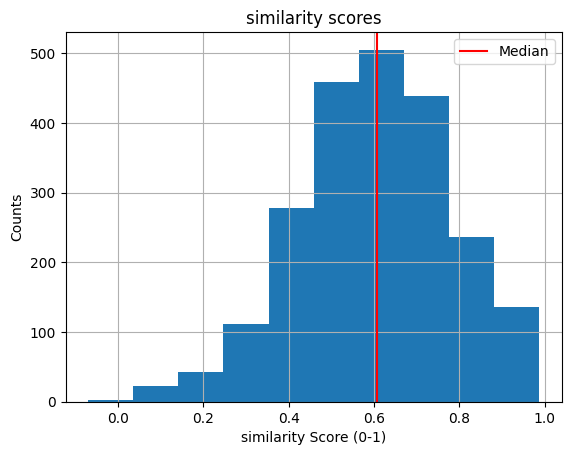

In [31]:
plot_sim_scores(test_inference, 'similarity'); # returns the figure and axes for customization 

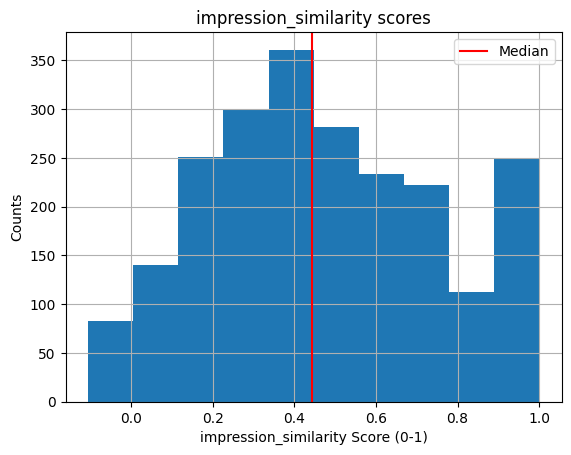

In [32]:
plot_sim_scores(test_inference, 'impression_similarity');

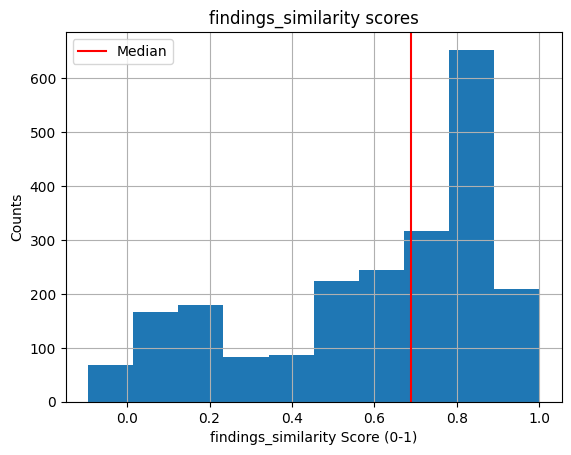

In [33]:
plot_sim_scores(test_inference, 'findings_similarity');

In [34]:
import plotly.express as px

In [35]:
fig = px.histogram(test_inference, x="similarity", title='Report Similarity Scores 022924')
fig.show()

In [36]:
fig = px.histogram(test_inference, x="impression_similarity", title='Impression Section Similarity Scores 022924')
fig.show()

In [37]:
fig = px.histogram(test_inference, x="findings_similarity", title='Findings Section Similarity Scores 022924')
fig.show()

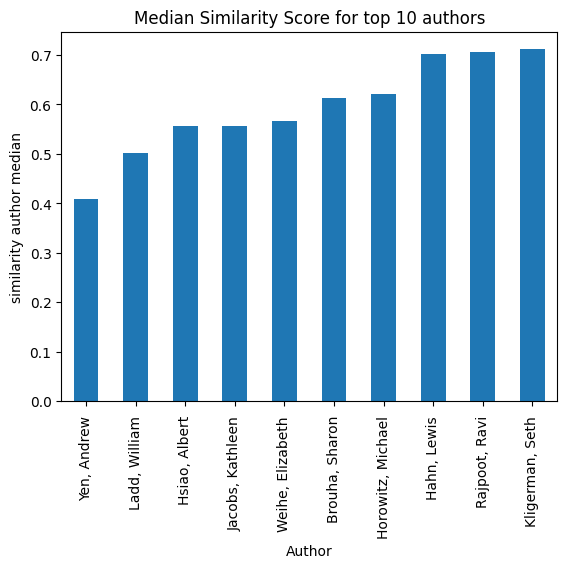

In [38]:
plot_author_medians(test_inference, '02-29-24/plots'); # TODO: make plots by author and loop through author similarity histograms

In [39]:
list(test_inference.columns)

['phonetic_id',
 'author',
 'llava_findings',
 'llava_impression',
 'llava_report',
 'radiologist_report',
 'radiologist_findings',
 'radiologist_impression',
 'similarity',
 'impression_similarity',
 'findings_similarity',
 'is_si_l',
 'is_si_r',
 'lf_len',
 'li_len',
 'rf_len',
 'ri_len']

In [40]:
test_inference = test_inference.round(2)

In [41]:
test_inference_print = test_inference[['phonetic_id',
 'author',
 'llava_report',
 'radiologist_report',
 'similarity',
 'impression_similarity',
 'findings_similarity']]

BIN INDEX 1


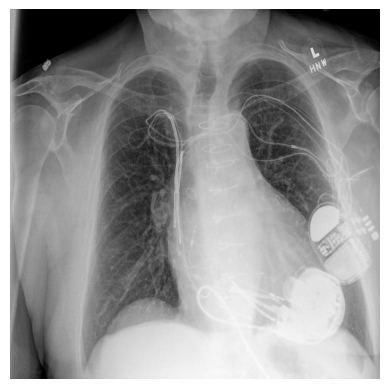

Row Data Overview:
ID:                      54077065
--------------------------------------------------
phonetic_id:             Bajoru
author:                  Yen, Andrew
llava_report:            FINDINGS: See impression. IMPRESSION: No definite
change or acute abnormality.
radiologist_report:      FINDINGS: Redemonstration of a left ventricular
assist device and a left-sided ICD device with
multiple leads. Prior coronary revascularization.
No pleural effusion or pneumothorax demonstrated.
No consolidation. Redemonstration of a large
cardiomediastinal silhouette. Conspicuous
pulmonary vessels, probably unchanged. Sternotomy
wires. No acute osseous abnormality identified.
IMPRESSION: No definite acute abnormality
similarity:              -0.02
impression_similarity:   0.73
findings_similarity:     0.01
--------------------------------------------------
BIN INDEX 2


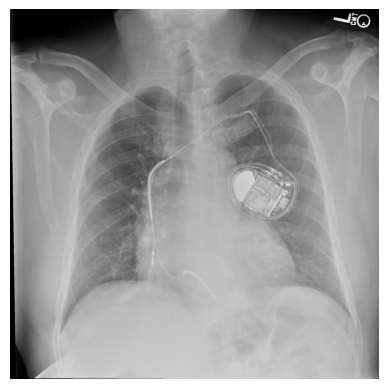

Row Data Overview:
ID:                      51278407
--------------------------------------------------
phonetic_id:             Firosu
author:                  Yen, Andrew
llava_report:            FINDINGS: See impression. IMPRESSION: No definite
change or acute abnormality.
radiologist_report:      FINDINGS: Lines, Devices and Tubes: Left chest
wall dual chamber AICD with leads in the right
atrium and right ventricle, with partial fracture
of the right ventricular lead at the left
costoclavicular space. The right atrial lead may
be loose. Questionable myocardial perforation by
the right ventricular lead tip, but no evidence of
a pericardial effusion. Mediastinum: The
cardiomediastinal silhouette is enlarged. Lungs:
Peribronchial cuffing. Mild septal thickening and
basal predominant reticular opacification. Pleura:
No pneumothorax or effusion. Bones and soft
tissues: Degenerative changes of the spine and
acromioclavicular joints. CONCURRENT SUPERVISION:
I have reviewed the images and 

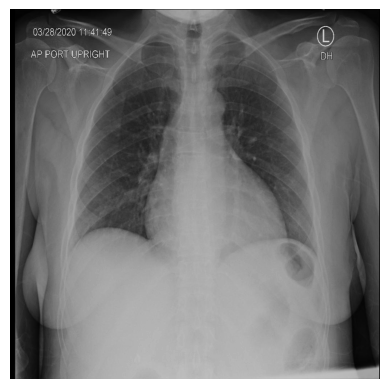

Row Data Overview:
ID:                      52498396
--------------------------------------------------
phonetic_id:             Faritep
author:                  Hsiao, Albert
llava_report:            FINDINGS: Lines and Tubes: None Mediastinum: The
cardiomediastinal silhouette is unchanged. No
lymphadenopathy is appreciated. Lungs: The lungs
are clear. Pleura: No pneumothorax or effusion.
Bones and soft tissues: Unchanged CONCURRENT
SUPERVISION: I have reviewed the images and agree
with the resident interpretation. Preliminary
created by: Alshehri, Wael IMPRESSION: No acute
cardiopulmonary findings.
radiologist_report:      FINDINGS: The cardiomediastinal silhouette remains
enlarged. The lungs remain clear. No
consolidation, effusion or pneumothorax is
demonstrated. Visualized osseous structures appear
intact. Surgical clips are present in the right
upper quadrant reflecting prior cholecystectomy.
IMPRESSION: Stable appearance of the chest. No
acute cardiopulmonary findings. Cardiomeg

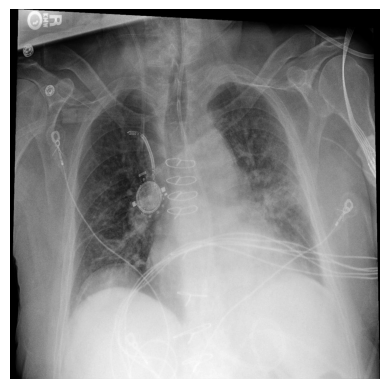

Row Data Overview:
ID:                      54189056
--------------------------------------------------
phonetic_id:             Wisnasha
author:                  Hsiao, Albert
llava_report:            FINDINGS: See impression. IMPRESSION: Stable
appearance of the chest and supportive devices.
Persistent interstitial pulmonary edema.
radiologist_report:      FINDINGS: See impression. IMPRESSION: Increased
asymmetric ill-defined opacities are present
predominantly in the left upper lung and right mid
lung. Pulmonary vascular markings appear
cephalized and indistinct. Findings may represent
a combination of worsening pulmonary edema and
pneumonia.
similarity:              0.31
impression_similarity:   0.26
findings_similarity:     0.84
--------------------------------------------------
BIN INDEX 5


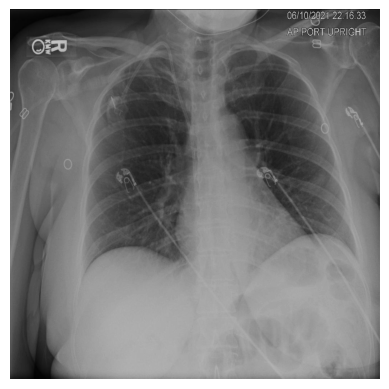

Row Data Overview:
ID:                      53738853
--------------------------------------------------
phonetic_id:             Hifosef
author:                  Rastogi, Monika
llava_report:            FINDINGS: Lines and Tubes: None Mediastinum: The
cardiomediastinal silhouette is unchanged. No
lymphadenopathy is appreciated. Lungs: The lungs
are clear. Pleura: No pneumothorax or effusion.
Bones and soft tissues: Unchanged IMPRESSION: No
acute cardiopulmonary abnormality.
radiologist_report:      FINDINGS: See IMPRESSION. Preliminary created by:
Brown, Dustin IMPRESSION: Devices: Right chest
wall port with tip projecting over the superior
cavoatrial junction. Lungs & pleura: Lungs are
clear. Mediastinum: Stable. Bones & soft tissues:
Stable.
similarity:              0.45
impression_similarity:   0.23
findings_similarity:     0.14
--------------------------------------------------
BIN INDEX 6


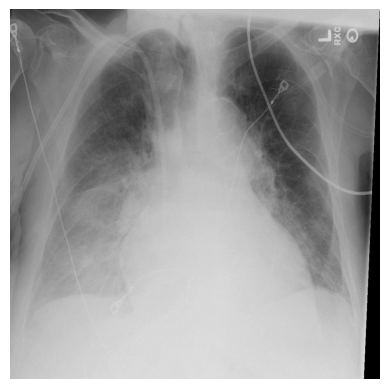

Row Data Overview:
ID:                      53862800
--------------------------------------------------
phonetic_id:             Nojitie
author:                  Jacobs, Kathleen
llava_report:            Increased lung expansion. No other change. Stable
appearance of the chest status post bilateral lung
transplantation with small pleural effusions and
bibasal atelectasis.
radiologist_report:      FINDINGS: See impression IMPRESSION: Increased
bibasal and right midlung opacities. Asymmetric
somewhat hazy morphology right mid/basal opacities
suggest development of layering pleural effusion.
Basal opacity may reflect atelectasis but
superimposed aspiration/pneumonia possible. No
other change. Background pulmonary edema. Enlarged
cardiomediastinal silhouette..
similarity:              0.48
impression_similarity:   -0.02
findings_similarity:     0.12
--------------------------------------------------
BIN INDEX 7


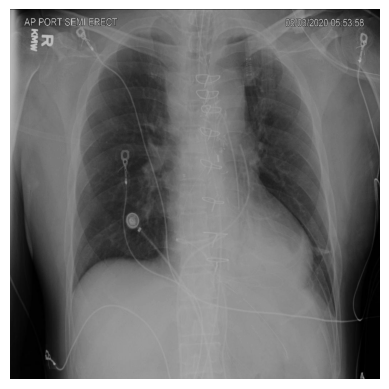

Row Data Overview:
ID:                      52554675
--------------------------------------------------
phonetic_id:             Eremen
author:                  Horowitz, Michael
llava_report:            FINDINGS: Devices, lines and Tubes: Endotracheal
tube projects 3.5 cm above the carina. Enteric
tube course below the diaphragm with side port
projecting over the gastric fundus. Right
transjugular Swan-Ganz catheter followed to the
main pulmonary artery. Subxiphoid drains.
Epicardial pacing wires. Mediastinum: Interval
heart transplant. Normal mediastinal contours. No
lymphadenopathy is appreciated. Lungs: Low lung
volumes. Bibasal linear opacities. Pleura: No
pneumothorax or effusion. Bones and soft tissues:
Interval median sternotomy. IMPRESSION: Expected
appearance of the chest status post heart
transplant. Support lines and tubes in good
position as detailed above. No acute
cardiopulmonary findings.
radiologist_report:      FINDINGS: See impression. IMPRESSION: Intra-aortic
balloo

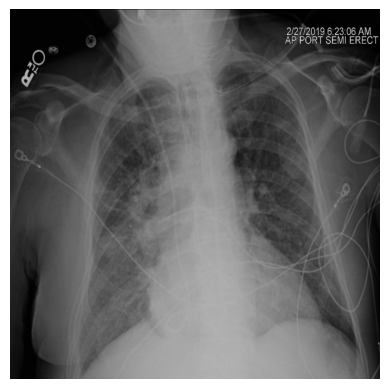

Row Data Overview:
ID:                      51381746
--------------------------------------------------
phonetic_id:             Sisupeck
author:                  Kligerman, Seth
llava_report:            FINDINGS: Lines and Tubes: Swans Ganz catheter,
AICD, PICC are in good position Mediastinum: The
cardiomediastinal silhouette is enlarged but
unchanged. No lymphadenopathy is appreciated.
Lungs: Perihilar lower lung opacity is unchanged
Pleura: Effusions are unchanged Bones and soft
tissues: Unchanged IMPRESSION: No change in edema,
atelectasis, effusions, atelectasis
radiologist_report:      FINDINGS: Lines and Tubes: Esophagogastric tube is
in appropriate position. PA catheter is in good
position Mediastinum: The cardiomediastinal
silhouette is unchanged. No lymphadenopathy is
appreciated. Lungs: Perihilar opacities slightly
improved Pleura: No pneumothorax or effusion.
Bones and soft tissues: Unchanged IMPRESSION:
Slight improvement in pulmonary edema
similarity:              0.75
i

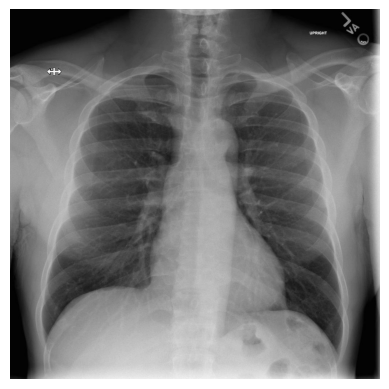

Row Data Overview:
ID:                      53608406
--------------------------------------------------
phonetic_id:             Fabasep
author:                  Hahn, Lewis
llava_report:            FINDINGS: Lines and Tubes: None Mediastinum: The
cardiomediastinal silhouette is unchanged. Lungs:
Low lung volumes. No consolidation. Pleura: No
pneumothorax or effusion. Bones and soft tissues:
Unchanged CONCURRENT SUPERVISION: I have reviewed
the images and agree with the resident
interpretation. Preliminary created by: Barnawi,
Rashid IMPRESSION: No acute cardiopulmonary
abnormality.
radiologist_report:      FINDINGS: Lines and Tubes: None Mediastinum: The
cardiomediastinal silhouette is within normal
limits. Lungs: The lungs are clear. Pleura: No
pneumothorax or effusion. Bones and soft tissues:
Minimal osteophytosis. CONCURRENT SUPERVISION: I
have reviewed the images and agree with the
resident interpretation. Preliminary created by:
Thumar, Vishal IMPRESSION: Normal chest radiograph


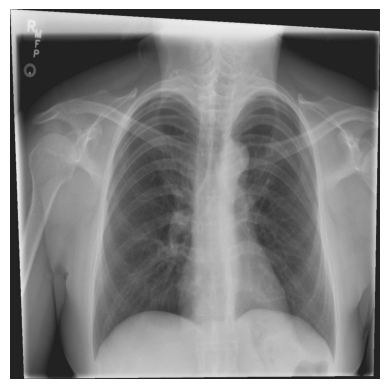

Row Data Overview:
ID:                      53397391
--------------------------------------------------
phonetic_id:             Kefikuze
author:                  Yen, Andrew
llava_report:            FINDINGS: No pleural effusion or pneumothorax
demonstrated. No consolidation. Unremarkable
cardiomediastinal silhouette. No acute osseous
abnormality identified. IMPRESSION: No evidence of
active pulmonary tuberculosis.
radiologist_report:      FINDINGS: No pleural effusion or pneumothorax
demonstrated. No new lung findings. Unremarkable
cardiomediastinal silhouette. No acute osseous
abnormality identified. IMPRESSION: No findings of
active pulmonary tuberculosis.
similarity:              0.95
impression_similarity:   0.97
findings_similarity:     0.94
--------------------------------------------------
BIN INDEX 11


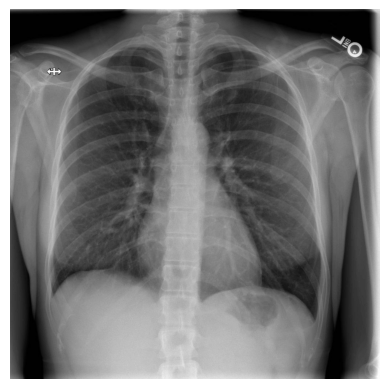

Row Data Overview:
ID:                      53995206
--------------------------------------------------
phonetic_id:             Nelarag
author:                  Jacobs, Kathleen
llava_report:            Lungs are well expanded and clear. No pleural
effusion or pneumothorax. Normal trachea and hilar
regions. Normal cardiomediastinal silhouette. No
acute osseous abnormality. IMPRESSION: No acute
findings.
radiologist_report:      FINDINGS: Lungs are well expanded and clear. No
pleural effusion or pneumothorax. Normal trachea
and hilar regions. Normal cardiomediastinal
silhouette. No acute osseous abnormality.
IMPRESSION: No acute findings.
similarity:              0.99
impression_similarity:   0.92
findings_similarity:     -0.03
--------------------------------------------------


In [42]:
for i in range(1, 12):
    print(f'BIN INDEX {i}')
    print_row_nicely(sample_by_bin(test_inference_print, 'similarity', i))

## TODO: show comparision on one plot between different prompts/iterations of llava for similarity scores

### Create Word Color Wheel 
* Compare the word distributions between LLaVA and the Reports 

### Select a few good X-Rays based on performance that we can display

In [43]:
# show examples of images and text by similarity score 
# show examples of images based off of bart classification labels 
# TODO: evaluate the new prompt inference used on the 02-29-24 model and compare with the current results

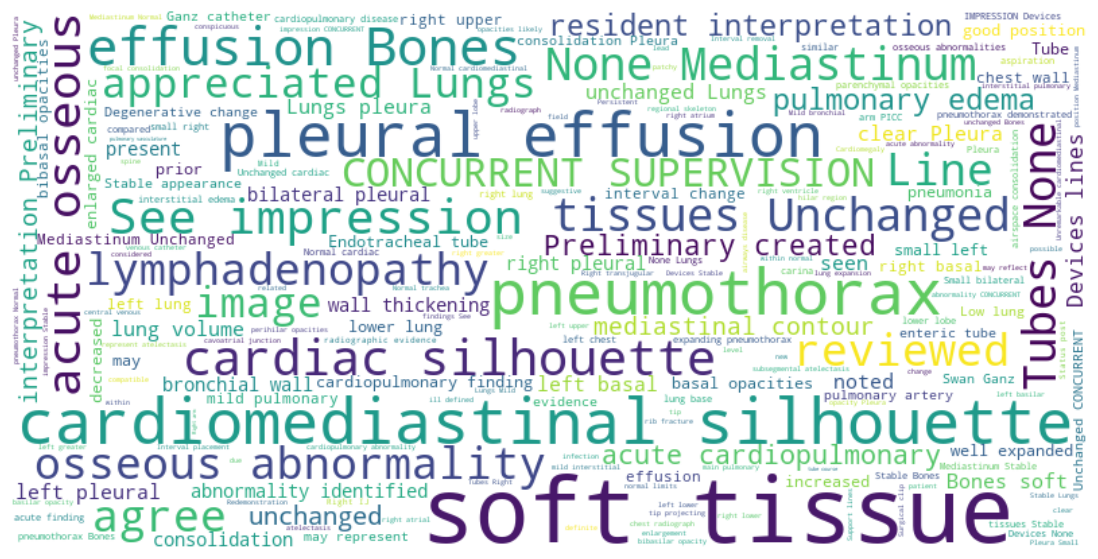

In [44]:
from wordcloud import WordCloud

data = test_inference['radiologist_report'].str.replace('FINDINGS:', '')
data = data.str.replace('IMPRESSION:', '')

text_data = ' '.join(data.dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



(-0.5, 799.5, 399.5, -0.5)

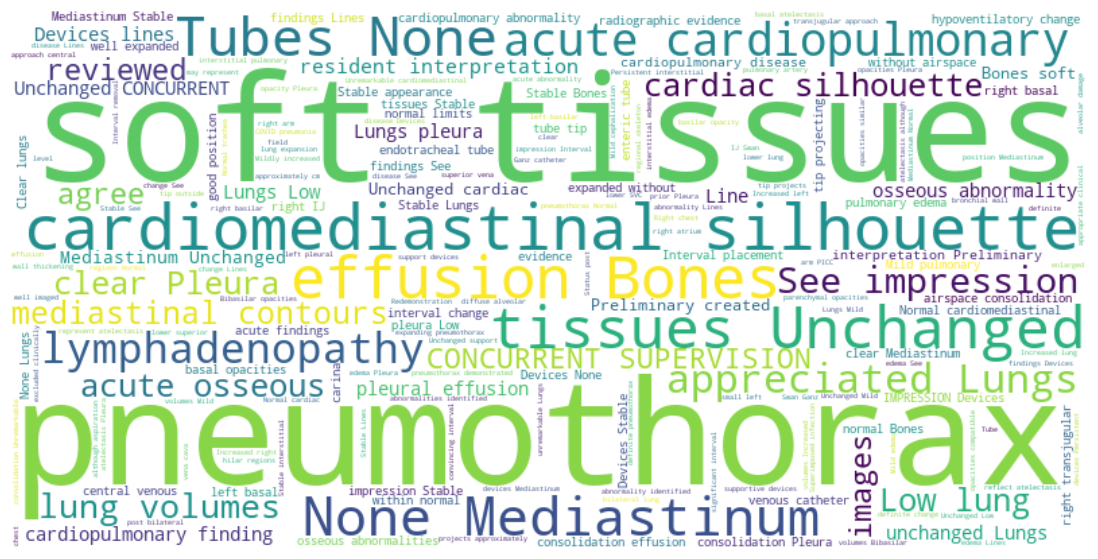

In [45]:
data = test_inference['llava_report'].str.replace('FINDINGS:', '')
data = data.str.replace('IMPRESSION:', '')

text_data = ' '.join(data.dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

#### I made scores for the 022924 dataset without No Abnormalities Included to see how that would work
Will load and process those below because I didn't want to clutter the cells above, or distract

In [46]:
llava_rep_scores2, radiologist_rep_scores2, llava_reports2, radiologist_reports2 \
    = read_scores_data('02-29-24/data/llava_classified_reports_test_set_2.csv', '02-29-24/data/radiologist_classified_reports_test_set_2.csv')

In [47]:
llava_rep_scores2

cardiomegaly  pneumothorax  pneumonia  pleural effusion  edema  \
id                                                                         
54059849          0.55          0.13       0.08              0.13   0.07   
53428634          0.38          0.24       0.07              0.18   0.07   
53439132          0.26          0.13       0.05              0.22   0.31   
50219723          0.51          0.11       0.09              0.11   0.13   
52165792          0.28          0.42       0.09              0.08   0.10   
...                ...           ...        ...               ...    ...   
53657129          0.19          0.15       0.09              0.12   0.39   
53670978          0.41          0.20       0.08              0.21   0.08   
52495793          0.16          0.10       0.06              0.19   0.44   
53245718          0.14          0.21       0.13              0.28   0.16   
54233739          0.19          0.19       0.07              0.29   0.18   

          rib fracture  
id                      
54059849          0.04  
53428634          0.07  
53439132          0.03  
50219723          0.06  
52165792          0.03  
...                ...  
53657129          0.06  
53670978          0.02  
52495793          0.05  
53245718          0.08  
54233739          0.08  

[2232 rows x 6 columns]

In [48]:
llava_rep_bart_scores

no abnormalities mentioned  cardiomegaly  pneumothorax  pneumonia  \
id                                                                            
54059849                        0.32          0.37          0.09       0.05   
53428634                        1.00          0.24          0.15       0.04   
53439132                        1.00          0.05          0.02       0.01   
50219723                        1.00          0.11          0.02       0.02   
52165792                        1.00          0.08          0.13       0.03   
...                              ...           ...           ...        ...   
53657129                        0.19          0.16          0.13       0.07   
53670978                        1.00          0.20          0.10       0.04   
52495793                        0.24          0.13          0.08       0.04   
53245718                        1.00          0.10          0.14       0.09   
54233739                        1.00          0.06          0.06       0.02   

          pleural effusion  edema  rib fracture  
id                                               
54059849              0.09   0.04          0.03  
53428634              0.11   0.04          0.04  
53439132              0.04   0.05          0.00  
50219723              0.02   0.03          0.01  
52165792              0.02   0.03          0.01  
...                    ...    ...           ...  
53657129              0.09   0.32          0.05  
53670978              0.10   0.04          0.01  
52495793              0.14   0.34          0.04  
53245718              0.19   0.11          0.05  
54233739              0.10   0.06          0.03  

[2232 rows x 7 columns]

In [49]:
llava_rep_labels2 = label_data_frame(llava_rep_scores2)
radiologist_rep_labels2 = label_data_frame(radiologist_rep_scores2)

In [50]:
llava_rep_labels

no abnormalities mentioned  cardiomegaly  pneumothorax  pneumonia  \
id                                                                            
54059849                       False          True         False      False   
53428634                        True         False         False      False   
53439132                        True         False         False      False   
50219723                        True         False         False      False   
52165792                        True         False         False      False   
...                              ...           ...           ...        ...   
53657129                       False         False         False      False   
53670978                        True         False         False      False   
52495793                       False         False         False      False   
53245718                        True         False         False      False   
54233739                        True         False         False      False   

          pleural effusion  edema  rib fracture  
id                                               
54059849             False  False         False  
53428634             False  False         False  
53439132             False  False         False  
50219723             False  False         False  
52165792             False  False         False  
...                    ...    ...           ...  
53657129             False   True         False  
53670978             False  False         False  
52495793             False   True         False  
53245718             False  False         False  
54233739             False  False         False  

[2232 rows x 7 columns]

In [51]:
llava_rep_labels2

cardiomegaly  pneumothorax  pneumonia  pleural effusion  edema  \
id                                                                         
54059849          True         False      False             False  False   
53428634          True          True      False             False  False   
53439132          True         False      False              True   True   
50219723          True         False      False             False  False   
52165792          True          True      False             False  False   
...                ...           ...        ...               ...    ...   
53657129         False         False      False             False   True   
53670978          True          True      False              True  False   
52495793         False         False      False             False   True   
53245718         False          True      False              True  False   
54233739         False         False      False              True  False   

          rib fracture  
id                      
54059849         False  
53428634         False  
53439132         False  
50219723         False  
52165792         False  
...                ...  
53657129         False  
53670978         False  
52495793         False  
53245718         False  
54233739         False  

[2232 rows x 6 columns]

In [52]:
radiologist_rep_labels

no abnormalities mentioned  cardiomegaly  pneumothorax  pneumonia  \
id                                                                            
54059849                        True         False         False      False   
53428634                       False          True         False      False   
53439132                        True         False         False      False   
50219723                        True         False         False      False   
52165792                        True         False         False      False   
...                              ...           ...           ...        ...   
53657129                       False         False         False       True   
53670978                        True         False         False      False   
52495793                        True         False         False      False   
53245718                       False         False          True      False   
54233739                        True         False         False      False   

          pleural effusion  edema  rib fracture  
id                                               
54059849             False  False         False  
53428634             False  False         False  
53439132             False  False         False  
50219723             False  False         False  
52165792             False  False         False  
...                    ...    ...           ...  
53657129             False   True         False  
53670978             False  False         False  
52495793             False  False         False  
53245718             False  False         False  
54233739             False  False         False  

[2232 rows x 7 columns]

In [53]:
radiologist_rep_labels2

cardiomegaly  pneumothorax  pneumonia  pleural effusion  edema  \
id                                                                         
54059849          True         False      False             False  False   
53428634          True          True      False             False  False   
53439132          True          True      False             False  False   
50219723          True         False      False             False  False   
52165792          True         False      False             False   True   
...                ...           ...        ...               ...    ...   
53657129         False         False       True             False   True   
53670978          True         False      False             False  False   
52495793          True         False      False              True  False   
53245718         False          True      False             False  False   
54233739         False          True      False              True  False   

          rib fracture  
id                      
54059849         False  
53428634         False  
53439132         False  
50219723         False  
52165792         False  
...                ...  
53657129         False  
53670978         False  
52495793         False  
53245718         False  
54233739         False  

[2232 rows x 6 columns]

In [54]:
llava_rep_scores2.mean().round(2)

cardiomegaly        0.31
pneumothorax        0.19
pneumonia           0.12
pleural effusion    0.17
edema               0.15
rib fracture        0.05
dtype: float64

In [55]:
llava_rep_bart_scores.mean().round(2)

no abnormalities mentioned    0.86
cardiomegaly                  0.16
pneumothorax                  0.10
pneumonia                     0.06
pleural effusion              0.10
edema                         0.09
rib fracture                  0.03
dtype: float64

In [56]:
def classify_reports(reports, candidate_labels):
    # ViktorDo/bart-base-finetuned-summaries-BioArxiv
    # maybe see how this does (not trusting that much to be honest)
    classifier = pipeline("zero-shot-classification", model="ViktorDo/bart-base-finetuned-summaries-BioArxiv", multilabel=True)
    results = classifier(reports, candidate_labels)
    structured_results = []
    for result in results:
        scores_dict = {label: score for label, score in zip(result['labels'], result['scores'])}
        scores_dict['report'] = result['sequence']
        structured_results.append(scores_dict)
    return structured_results

In [57]:
test_inference['radiologist_report'].iloc[0:10]

id
54059849    FINDINGS:\nLungs are well expanded and clear. ...
53428634    FINDINGS:\nLines and Tubes: Right upper extrem...
53439132    FINDINGS:\nLines and Tubes: None  Mediastinum:...
50219723    FINDINGS:\nSee impression\n\nIMPRESSION: Exam ...
52165792    FINDINGS:/:   \nNo evidence for focal pneumoni...
53573048    FINDINGS:\nDevices, lines and Tubes: None    M...
52569216    FINDINGS:\nLines and Tubes: Right subclavian a...
53921895    FINDINGS:\nSee impression.\n\nIMPRESSION: Remo...
53487849    FINDINGS:\nDevices, lines and Tubes: Right tra...
54147033    FINDINGS:\nLines and Tubes: Endotracheal tube ...
Name: radiologist_report, dtype: object

1. radiologist_rep_bart_scores
2. radiologist_rep_labels
3. radiologist_rep_scores2
4. radiologist_rep_labels2

In [58]:
print(radiologist_rep_bart_scores.columns)

Index(['no abnormalities mentioned', 'cardiomegaly', 'pneumothorax',
       'pneumonia', 'pleural effusion', 'edema', 'rib fracture'],
      dtype='object')


In [59]:
# where no abnomalities mentioned true 
radiologist_rep_bart_scores[radiologist_rep_labels['no abnormalities mentioned']].drop(columns='no abnormalities mentioned')

cardiomegaly  pneumothorax  pneumonia  pleural effusion  edema  \
id                                                                         
54059849          0.29          0.11       0.09              0.07   0.05   
53439132          0.18          0.14       0.09              0.10   0.07   
50219723          0.18          0.10       0.11              0.11   0.07   
52165792          0.08          0.05       0.05              0.02   0.08   
53573048          0.19          0.14       0.11              0.11   0.07   
...                ...           ...        ...               ...    ...   
53879992          0.22          0.07       0.02              0.07   0.04   
52524739          0.15          0.11       0.07              0.13   0.08   
53670978          0.14          0.03       0.02              0.03   0.04   
52495793          0.26          0.12       0.03              0.16   0.05   
54233739          0.09          0.15       0.08              0.21   0.12   

          rib fracture  
id                      
54059849          0.03  
53439132          0.07  
50219723          0.04  
52165792          0.02  
53573048          0.08  
...                ...  
53879992          0.01  
52524739          0.05  
53670978          0.02  
52495793          0.03  
54233739          0.04  

[1225 rows x 6 columns]

In [60]:
radiologist_rep_scores2[radiologist_rep_labels['no abnormalities mentioned']]

cardiomegaly  pneumothorax  pneumonia  pleural effusion  edema  \
id                                                                         
54059849          0.45          0.17       0.14              0.11   0.08   
53439132          0.28          0.22       0.13              0.16   0.11   
50219723          0.29          0.17       0.18              0.18   0.11   
52165792          0.27          0.17       0.16              0.08   0.27   
53573048          0.27          0.19       0.16              0.16   0.10   
...                ...           ...        ...               ...    ...   
53879992          0.53          0.16       0.04              0.16   0.09   
52524739          0.26          0.18       0.12              0.22   0.13   
53670978          0.50          0.10       0.07              0.11   0.14   
52495793          0.40          0.18       0.05              0.24   0.08   
54233739          0.13          0.21       0.12              0.30   0.18   

          rib fracture  
id                      
54059849          0.05  
53439132          0.10  
50219723          0.07  
52165792          0.06  
53573048          0.11  
...                ...  
53879992          0.02  
52524739          0.09  
53670978          0.08  
52495793          0.04  
54233739          0.05  

[1225 rows x 6 columns]

In [61]:
print(test_inference.loc[50219723]['radiologist_report'])

FINDINGS:
See impression

IMPRESSION: Exam is somewhat limited by patient body habitus. Patchy bibasilar opacities, likely reflect aspiration/atelectasis. No lobar consolidation is suggest bronchopneumonia. No pneumothorax or pleural effusion. Normal cardiomediastinal silhouette. Unremarkable superior abdomen. No displaced fractures or malalignment.


In [62]:
# where no abnomalities mentioned false

# maybe should examine ones where margin between no abnormalities mentioned and other is small
radiologist_rep_bart_scores[~radiologist_rep_labels['no abnormalities mentioned']]

no abnormalities mentioned  cardiomegaly  pneumothorax  pneumonia  \
id                                                                            
53428634                        0.23          0.26          0.17       0.09   
52569216                        0.13          0.18          0.12       0.06   
53921895                        0.21          0.05          0.04       0.02   
53487849                        0.26          0.17          0.15       0.03   
53324425                        0.23          0.11          0.03       0.07   
...                              ...           ...           ...        ...   
52613869                        0.07          0.03          0.33       0.32   
51994715                        0.36          0.44          0.08       0.01   
53609774                        0.28          0.10          0.02       0.02   
53657129                        0.14          0.08          0.12       0.21   
53245718                        0.12          0.06          0.44       0.11   

          pleural effusion  edema  rib fracture  
id                                               
53428634              0.13   0.06          0.07  
52569216              0.07   0.40          0.03  
53921895              0.60   0.07          0.02  
53487849              0.31   0.06          0.03  
53324425              0.17   0.38          0.02  
...                    ...    ...           ...  
52613869              0.13   0.10          0.02  
51994715              0.04   0.06          0.01  
53609774              0.46   0.11          0.01  
53657129              0.16   0.22          0.06  
53245718              0.09   0.15          0.02  

[1007 rows x 7 columns]

In [63]:
radiologist_rep_scores2[~radiologist_rep_labels['no abnormalities mentioned']]

cardiomegaly  pneumothorax  pneumonia  pleural effusion  edema  \
id                                                                         
53428634          0.33          0.23       0.11              0.17   0.07   
52569216          0.21          0.14       0.06              0.08   0.47   
53921895          0.06          0.06       0.03              0.76   0.08   
53487849          0.22          0.20       0.04              0.41   0.08   
53324425          0.14          0.04       0.09              0.21   0.49   
...                ...           ...        ...               ...    ...   
52613869          0.03          0.35       0.35              0.14   0.11   
51994715          0.69          0.12       0.02              0.07   0.09   
53609774          0.13          0.03       0.02              0.65   0.16   
53657129          0.10          0.14       0.25              0.19   0.26   
53245718          0.07          0.50       0.12              0.11   0.17   

          rib fracture  
id                      
53428634          0.09  
52569216          0.04  
53921895          0.02  
53487849          0.04  
53324425          0.02  
...                ...  
52613869          0.02  
51994715          0.02  
53609774          0.01  
53657129          0.07  
53245718          0.03  

[1007 rows x 6 columns]

In [64]:
print(test_inference.loc[51994715]['radiologist_report'])

FINDINGS:
The cardiomediastinal silhouette remains enlarged. Large central pulmonary arteries are again noted. Pulmonary vascular markings appear mildly indistinct, unchanged. Stable reticulation is noted in the lung bases. No pneumothorax or effusion. Visualized
osseous structures appear grossly intact.

IMPRESSION: Stable chest x-ray. No acute findings.
Cardiomegaly with enlarged central pulmonary arteries, compatible with history of pulmonary hypertension.


In [65]:
radiologist_rep_bart_scores['no abnormalities mentioned'] - 

SyntaxError: invalid syntax (1193953020.py, line 1)

In [ ]:
radiologist_rep_bart_scores.sum(axis=1).mean()

1.3158960573476703

In [ ]:
radiologist_rep_bart_scores.sum(axis=1).max()

1.81

In [ ]:
radiologist_rep_bart_scores.sum(axis=1).min()

0.9799999999999999

In [ ]:
radiologist_rep_bart_scores.max()

no abnormalities mentioned    1.00
cardiomegaly                  0.89
pneumothorax                  0.77
pneumonia                     0.62
pleural effusion              0.90
edema                         0.87
rib fracture                  0.77
dtype: float64

In [ ]:
radiologist_rep_bart_scores.min()

no abnormalities mentioned    0.01
cardiomegaly                  0.01
pneumothorax                  0.01
pneumonia                     0.00
pleural effusion              0.01
edema                         0.01
rib fracture                  0.00
dtype: float64

In [66]:
llava_rep_labels

no abnormalities mentioned  cardiomegaly  pneumothorax  pneumonia  \
id                                                                            
54059849                       False          True         False      False   
53428634                        True         False         False      False   
53439132                        True         False         False      False   
50219723                        True         False         False      False   
52165792                        True         False         False      False   
...                              ...           ...           ...        ...   
53657129                       False         False         False      False   
53670978                        True         False         False      False   
52495793                       False         False         False      False   
53245718                        True         False         False      False   
54233739                        True         False         False      False   

          pleural effusion  edema  rib fracture  
id                                               
54059849             False  False         False  
53428634             False  False         False  
53439132             False  False         False  
50219723             False  False         False  
52165792             False  False         False  
...                    ...    ...           ...  
53657129             False   True         False  
53670978             False  False         False  
52495793             False   True         False  
53245718             False  False         False  
54233739             False  False         False  

[2232 rows x 7 columns]

In [67]:
radiologist_rep_labels

no abnormalities mentioned  cardiomegaly  pneumothorax  pneumonia  \
id                                                                            
54059849                        True         False         False      False   
53428634                       False          True         False      False   
53439132                        True         False         False      False   
50219723                        True         False         False      False   
52165792                        True         False         False      False   
...                              ...           ...           ...        ...   
53657129                       False         False         False       True   
53670978                        True         False         False      False   
52495793                        True         False         False      False   
53245718                       False         False          True      False   
54233739                        True         False         False      False   

          pleural effusion  edema  rib fracture  
id                                               
54059849             False  False         False  
53428634             False  False         False  
53439132             False  False         False  
50219723             False  False         False  
52165792             False  False         False  
...                    ...    ...           ...  
53657129             False   True         False  
53670978             False  False         False  
52495793             False  False         False  
53245718             False  False         False  
54233739             False  False         False  

[2232 rows x 7 columns]

In [73]:
llava_rep_labels[np.all(llava_rep_labels == radiologist_rep_labels, axis=1)]

no abnormalities mentioned  cardiomegaly  pneumothorax  pneumonia  \
id                                                                            
53439132                        True         False         False      False   
50219723                        True         False         False      False   
52165792                        True         False         False      False   
53573048                        True         False         False      False   
53487849                       False         False         False      False   
...                              ...           ...           ...        ...   
53767982                        True         False         False      False   
53879992                        True         False         False      False   
52524739                        True         False         False      False   
53670978                        True         False         False      False   
54233739                        True         False         False      False   

          pleural effusion  edema  rib fracture  
id                                               
53439132             False  False         False  
50219723             False  False         False  
52165792             False  False         False  
53573048             False  False         False  
53487849              True  False         False  
...                    ...    ...           ...  
53767982             False  False         False  
53879992             False  False         False  
52524739             False  False         False  
53670978             False  False         False  
54233739             False  False         False  

[1112 rows x 7 columns]